In [2]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#redefining the header and checking data types for EDA

col_names = ['age', 'workclass', 'fnlwgt','education', 'education-num', 
'marital-status', 'occupation', 'relationship', 'race', 'sex',
'capital-gain','capital-loss', 'hours-per-week','native-country', 'income']

df = pd.read_csv('adult.data',header = None, names = col_names)
print(df.head())
print(df.info())

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50

Coefficients:  [ 3.71309343e-02  3.15158608e-04  6.67023675e-04  1.44125666e-02
  1.81372449e-02  1.03689707e+00  0.00000000e+00 -3.12404903e-01
  0.00000000e+00  1.21333666e-01 -5.69619042e-01  0.00000000e+00
  0.00000000e+00 -3.96701331e-01 -8.96791323e-01 -4.99515335e-01
  5.78645633e-01  5.53117735e-01  1.28978080e+00  1.80272856e+00
  0.00000000e+00  1.60487566e+00  0.00000000e+00  1.82794191e+00
  3.90954884e-01] 
 Intercept:  [-5.67229043]


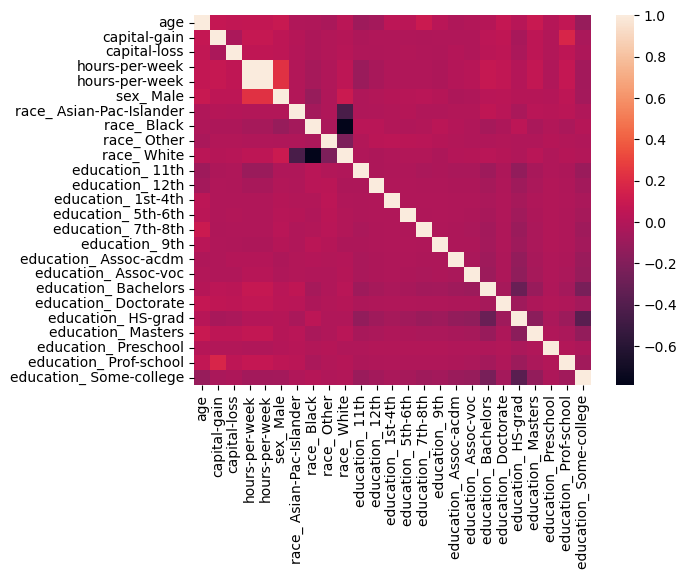

In [69]:
#Checking class imbalance 
#(how the sample is split between the two possible categories of the target variable)

#print(df['income'].value_counts()) -> rich_to_poor = 7841/24720 -> 0.3171

#transforming several features in dummies
feature_cols = ['age','capital-gain', 'capital-loss', 'hours-per-week', 'sex','race', 'hours-per-week', 'education']
X = pd.get_dummies(df[feature_cols], drop_first = True) #avoiding the dummy trap of collinearity
#print(X) to see how the get_dummies have tranformed our features

sns.heatmap(X.corr())
#Now that our features are all dummies, we don't need to rescale them
#print(df['income'].unique()) -> [' <=50K' ' >50K']

#Setting our target variable as a dummy
y = np.where(df.income ==' <=50K', 0, 1) #NB: notice the empty space in ' <=50K'
#print(y.shape) -> (32561,)


#Spliting the data into a training and testing set. 
#fit a logistic regression model in scikit-learn on the training set with parameters C=0.05, penalty='l1', solver='liblinear'.
#Lastly, use .predict() to create the y predictions and save this as y_pred.

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2 )

#setting the logistic regression models
logistic_rm = LogisticRegression(C=0.05, penalty='l1', solver='liblinear')
logistic_rm.fit(x_train, y_train)

y_pred = logistic_rm.predict(x_test)
y_pred_prob = logistic_rm.predict_proba(x_test)
print('Coefficients: ', logistic_rm.coef_[0] , '\n',   'Intercept: ' , logistic_rm.intercept_ )


In [67]:
#Model Performance
print(confusion_matrix(y_test, y_pred))

#accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
accuracy = round(accuracy_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred), 3)
f1 = round(f1_score(y_test, y_pred), 3)
recall = round(recall_score(y_test, y_pred), 3)
roc = roc_curve(y_test, y_pred_prob[:,1])
roc_auc = round(roc_auc_score(y_test, y_pred), 3)

print(f'Accuracy Score on test set: {accuracy}' '\n',
    f'Precision Score on test set: {precision}' '\n',
    f'F1 Score on test set: {f1}' '\n',
    f'Recall Score on test set: {recall}' '\n',
    f'ROC Score on test set: {roc}' '\n',
    f'ROC-AUC Score on test set: {roc_auc}' '\n')


[[4779  247]
 [ 880  607]]
Accuracy Score on test set: 0.827
 Precision Score on test set: 0.711
 F1 Score on test set: 0.519
 Recall Score on test set: 0.408
 ROC Score on test set: (array([0.        , 0.        , 0.        , ..., 0.99920414, 0.99960207,
       1.        ]), array([0.        , 0.00134499, 0.00268998, ..., 1.        , 1.        ,
       1.        ]), array([2.        , 1.        , 1.        , ..., 0.00570998, 0.00553106,
       0.00395256]))
 ROC-AUC Score on test set: 0.68



In [90]:
#Createing a new DataFrame of the model coefficients and variable names, sorted 
#based on coefficient and excluding any that are equal to zero. 


coef_df = pd.DataFrame(zip(x_train.columns, logistic_rm.coef_[0]), columns=['feature', 'coefficient']).sort_values('coefficient')
print(coef_df.shape)
coef_df = coef_df.loc[coef_df.coefficient > 0].reset_index(drop=True)
print(coef_df.shape)



(25, 2)
(14, 2)


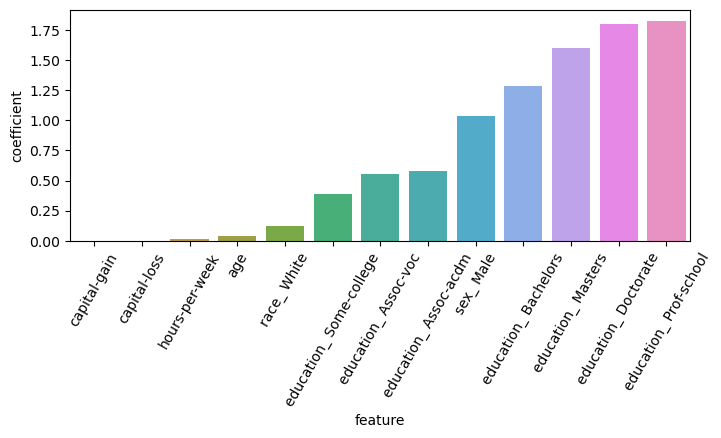

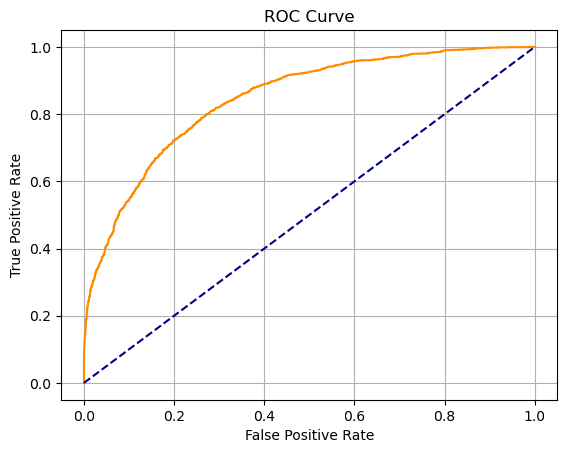

In [100]:
#Barplot
fig, ax = plt.subplots(figsize=(8, 3))  # generate a figure and return figure and axis handle 
sns.barplot(data = coef_df, x = 'feature', y = 'coefficient', ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60) #rotating the labels
plt.show()

#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob[:,1])

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1], color='navy',linestyle='--') #plotting the diagonal (random guessing benchmark)
plt.title('ROC Curve')
plt.grid()
plt.show()